In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r"C:\Users\student\Downloads\train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
def cal_missing_values(df): 
    missing_count=df.isnull().sum().sort_values(ascending=False)
    missing_percent=round(missing_count/len(data)*100,2)
    missing_info=pd.concat([missing_count,missing_percent],axis=1,
    keys=["missing value count","percentage of missing values"])
    return missing_info
print("*"*20,"missing value information of training data","*"*20)
print(cal_missing_values(data))


******************** missing value information of training data ********************
             missing value count  percentage of missing values
Cabin                        687                         77.10
Age                          177                         19.87
Embarked                       2                          0.22
Fare                           0                          0.00
Ticket                         0                          0.00
Parch                          0                          0.00
SibSp                          0                          0.00
Gender                         0                          0.00
Name                           0                          0.00
Pclass                         0                          0.00
Survived                       0                          0.00
PassengerId                    0                          0.00


In [5]:
print("mean age of passenger",data.Age.mean())
print("Mode Age of passenger",data.Age.median())

mean age of passenger 29.69911764705882
Mode Age of passenger 28.0


In [14]:
data.Age.fillna(data.Age.mean(),inplace=True)


In [9]:
print("Mode of Embarked :",data.Embarked.mode().values[0])

Mode of Embarked : S


In [10]:
data.Embarked.fillna(data.Embarked.mode().values[0],inplace=True)

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [16]:
print(cal_missing_values(data))

             missing value count  percentage of missing values
Cabin                        687                         77.10
Embarked                       2                          0.22
Fare                           0                          0.00
Ticket                         0                          0.00
Parch                          0                          0.00
SibSp                          0                          0.00
Age                            0                          0.00
Gender                         0                          0.00
Name                           0                          0.00
Pclass                         0                          0.00
Survived                       0                          0.00
PassengerId                    0                          0.00


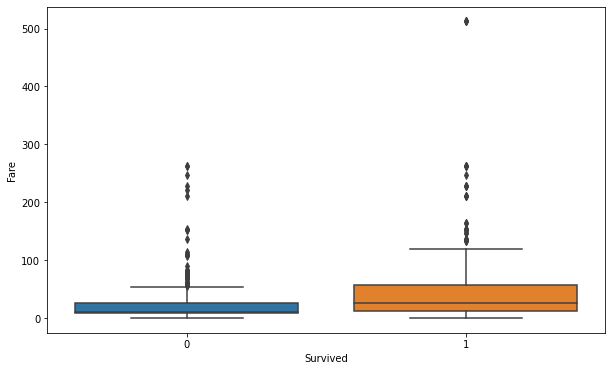

In [22]:
plt.figure(figsize=(10,6))
boxplt=sns.boxplot(x=data.Survived,y=data.Fare)

In [24]:
data[data.Fare>300]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [28]:
col_to_drop=["Cabin","Name","Ticket"]
data.drop(columns=col_to_drop,axis=1, inplace=True)

In [30]:
data.head()

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [33]:
data=pd.get_dummies(data,columns=["Gender","Embarked"],drop_first=True)

# creating buckets for Age column

In [42]:
def catagorize_data(Age):
    if Age<=12:
        return '0'
    if Age<=18:
        return '1'
    if Age<=59:
        return '2'
    else:
        return '3'
data["Age"]=data["Age"].map(catagorize_data)

TypeError: '<=' not supported between instances of 'str' and 'int'

In [43]:
data.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S
0,1,0,3,2,1,0,7.2500,1,0,1
1,2,1,1,2,1,0,71.2833,0,0,0
2,3,1,3,2,0,0,7.9250,0,0,1
3,4,1,1,2,1,0,53.1000,0,0,1
4,5,0,3,2,0,0,8.0500,1,0,1
5,6,0,3,3,0,0,8.4583,1,1,0
6,7,0,1,2,0,0,51.8625,1,0,1
7,8,0,3,0,3,1,21.0750,1,0,1
8,9,1,3,2,0,2,11.1333,0,0,1
9,10,1,2,1,1,0,30.0708,0,0,0


In [45]:
first_quantile=data.Fare.quantile(0.25)
second_quantile=data.Fare.quantile(0.5)
third_quantile=data.Fare.quantile(0.75)

def fare_bucketizer(r):
    if r<=first_quantile:
        return 0
    if r<=second_quantile:
        return 1
    if r<=third_quantile:
        return 2
    else:
        return 4
data["fare_class"]=data.Fare.apply(fare_bucketizer)
print(data.head(10))

   PassengerId  Survived  Pclass Age  SibSp  Parch     Fare  Gender_male  \
0            1         0       3   2      1      0   7.2500            1   
1            2         1       1   2      1      0  71.2833            0   
2            3         1       3   2      0      0   7.9250            0   
3            4         1       1   2      1      0  53.1000            0   
4            5         0       3   2      0      0   8.0500            1   
5            6         0       3   3      0      0   8.4583            1   
6            7         0       1   2      0      0  51.8625            1   
7            8         0       3   0      3      1  21.0750            1   
8            9         1       3   2      0      2  11.1333            0   
9           10         1       2   1      1      0  30.0708            0   

   Embarked_Q  Embarked_S  fare_class  
0           0           1           0  
1           0           0           4  
2           0           1           1  
3  

In [46]:
data.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S,fare_class
0,1,0,3,2,1,0,7.2500,1,0,1,0
1,2,1,1,2,1,0,71.2833,0,0,0,4
2,3,1,3,2,0,0,7.9250,0,0,1,1
3,4,1,1,2,1,0,53.1000,0,0,1,4
4,5,0,3,2,0,0,8.0500,1,0,1,1
5,6,0,3,3,0,0,8.4583,1,1,0,1
6,7,0,1,2,0,0,51.8625,1,0,1,4
7,8,0,3,0,3,1,21.0750,1,0,1,2
8,9,1,3,2,0,2,11.1333,0,0,1,1
9,10,1,2,1,1,0,30.0708,0,0,0,2


In [50]:
data.drop(columns="Fare")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Gender_male,Embarked_Q,Embarked_S,fare_class
0,1,0,3,2,1,0,1,0,1,0
1,2,1,1,2,1,0,0,0,0,4
2,3,1,3,2,0,0,0,0,1,1
3,4,1,1,2,1,0,0,0,1,4
4,5,0,3,2,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,2,0,0,1,0,1,1
887,888,1,1,2,0,0,0,0,1,2
888,889,0,3,3,1,2,0,0,1,2
889,890,1,1,2,0,0,1,0,0,2
